# importing the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style='whitegrid')
sns.set(font_scale=1.5);

import pandas as pd
import re

# Loading dataset

In [2]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\CHRM\\clinvar_conflicting.csv')
data.head(5)

C:\Users\USER\AppData\Local\Temp\ipykernel_11648\790320312.py:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('C:\\Users\\USER\\Desktop\\CHRM\\clinvar_conflicting.csv')


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [3]:
data.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,DISTANCE,STRAND,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,6.518800e+04,65188.000000,65188.000000,65188.000000,65188.000000,130.000000,65188.000000,108.000000,65174.000000,2.0,2.000000,60975.000000,64096.000000,64096.000000,25593.000000
mean,7.757594e+07,0.014511,0.014492,0.015263,1.342486,2.269231,0.252102,825.731481,-0.006659,1.0,-0.080000,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.057795,0.059542,0.059527,5.688772,4.190777,0.434223,1069.363315,0.999985,0.0,0.024042,0.361238,10.836350,2.961553,1.872684
min,9.610000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,1.0,-0.097000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.500000,-1.000000,1.0,-0.088500,0.024300,7.141000,0.462951,-2.000000
50%,5.797021e+07,0.000000,0.000040,0.000000,1.000000,1.000000,0.000000,469.000000,-1.000000,1.0,-0.080000,0.157000,14.090000,1.642948,-1.000000
75%,1.127454e+08,0.001200,0.001230,0.001600,1.000000,1.000000,1.000000,1415.000000,1.000000,1.0,-0.071500,0.710000,24.100000,4.381392,1.000000
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,16.000000,1.000000,4759.000000,1.000000,1.0,-0.063000,1.000000,99.000000,46.556261,3.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [5]:
data.shape

(65188, 46)

In [6]:
data.groupby(['CHROM', 'POS', 'REF', 'ALT']).ngroups

65188

# Data vizualisation

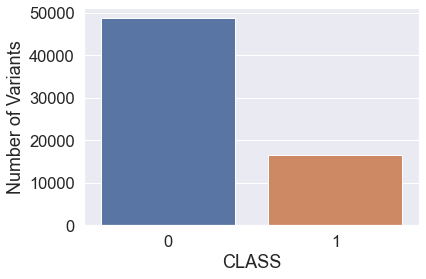

In [7]:
ax = sns.countplot(x="CLASS", data=data)
ax.set(xlabel='CLASS', ylabel='Number of Variants');

In [8]:
df = pd.crosstab(data.SYMBOL, data.CLASS, margins=True)

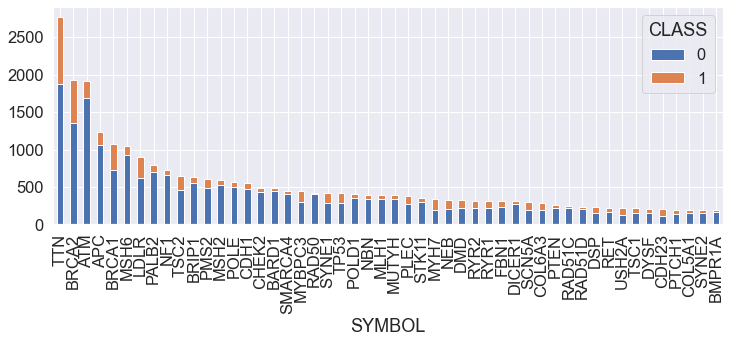

In [9]:
df= pd.crosstab(data.SYMBOL, data.CLASS, margins=True)
df.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
df = df.sort_values(by='All', ascending=False).head(50)
df.drop('All', axis=1, inplace=True)

df.plot.bar(stacked=True, figsize=(12, 4));

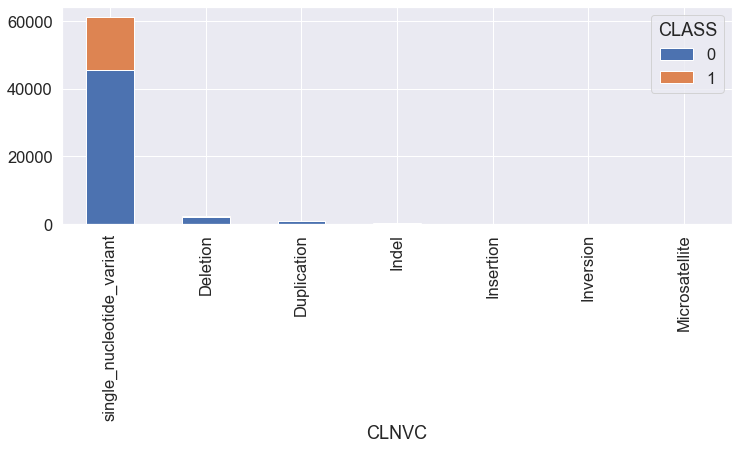

In [10]:
vt_ct = pd.crosstab(data.CLNVC, data.CLASS, margins=True)
vt_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
vt_ct = vt_ct.sort_values(by='All', ascending=False)
vt_ct.drop('All', axis=1, inplace=True)

vt_ct.plot.bar(stacked=True, figsize=(12, 4));

In [11]:
data.EXON.fillna('0', inplace=True)
data['variant_exon'] = data.EXON.apply(lambda x: [int(s) for s in re.findall(r'\b\d+\b', x)][0])

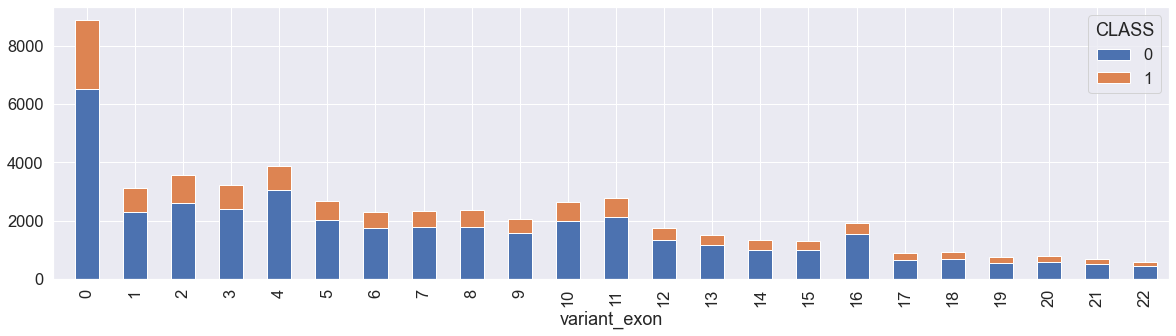

In [12]:
vant = pd.crosstab(data['variant_exon'], data['CLASS'])
vant.plot.bar(stacked=True, figsize=(20, 5));
plt.xlim(-0.7, 22.5);

In [14]:
MC_list = data.MC.dropna().str.split(',').apply(lambda row: list((c.split('|')[1] for c in row)))
MC_encoded = pd.get_dummies(MC_list.apply(pd.Series).stack()).sum(level=0)
MC_encoded = MC_encoded.reindex(index=MC_list.index)

# Incorporate the transformed MC feature into the existing DataFrame
data = data.join(MC_encoded).drop(columns=['MC'])

# Transformed MC feature
MC_encoded.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11648\3526978216.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  MC_encoded = pd.get_dummies(MC_list.apply(pd.Series).stack()).sum(level=0)


,2KB_upstream_variant,3_prime_UTR_variant,500B_downstream_variant,5_prime_UTR_variant,frameshift_variant,intron_variant,missense_variant,nonsense,splice_acceptor_variant,splice_donor_variant,synonymous_variant
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [15]:
mccounts= {0: {},
           1: {},
           'All': {}
          }

for col in MC_encoded.columns:
    for class_ in [0, 1]:
        mccounts[class_][col] = data.loc[data['CLASS'] == class_][col].sum()
    
    mccounts['All'][col] = data[col].sum()
    
mc_ct = pd.DataFrame.from_dict(mccounts)

mc_ct_all = mc_ct.sum(axis=0)
mc_ct_all.name = 'All'
mc_ct = mc_ct.append(mc_ct_all, ignore_index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_11648\2496321504.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_ct = mc_ct.append(mc_ct_all, ignore_index=False)


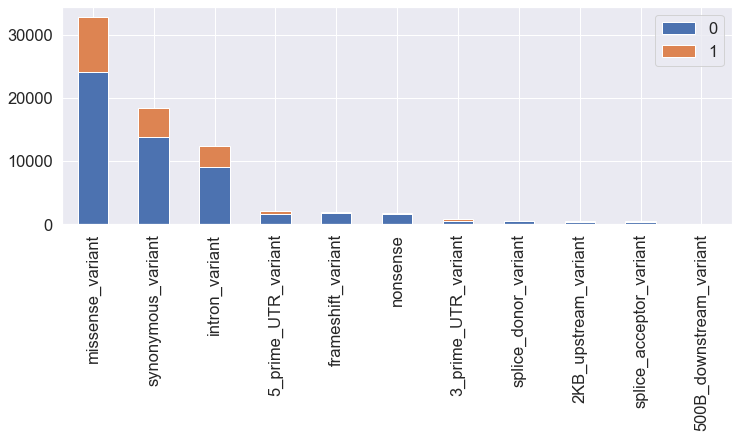

In [16]:
mc_ct.drop('All', axis=0, inplace=True)

mc_ct = mc_ct.sort_values(by='All', ascending=False)
mc_ct.drop('All', axis=1, inplace=True)

mc_ct.plot.bar(stacked=True, figsize=(12, 4));

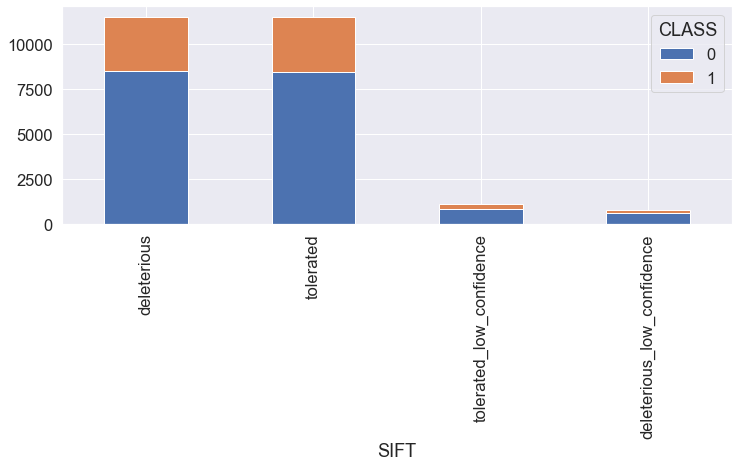

In [17]:
sift_ct = pd.crosstab(data.SIFT, data.CLASS, margins=True)
sift_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
sift_ct = sift_ct.sort_values(by='All', ascending=False)
sift_ct.drop('All', axis=1, inplace=True)

sift_ct.plot.bar(stacked=True, figsize=(12, 4));

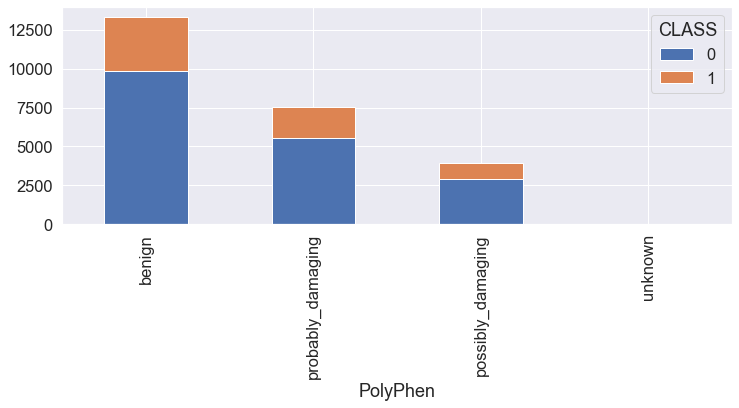

In [18]:
pp_ct = pd.crosstab(data.PolyPhen, data.CLASS, margins=True)
pp_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
pp_ct = pp_ct.sort_values(by='All', ascending=False)
pp_ct.drop('All', axis=1, inplace=True)

pp_ct.plot.bar(stacked=True, figsize=(12, 4));

In [19]:
data = pd.get_dummies(data, columns=['SIFT', 'PolyPhen'])

In [20]:
from itertools import combinations
from scipy.stats import chi2_contingency

In [21]:
# select a few categorical features
categoricals_index = pd.MultiIndex.from_tuples(combinations(['CHROM', 'REF', 'ALT', 'IMPACT', 'Consequence', 'SYMBOL', 'CLASS'], 2))
categoricals_corr = pd.DataFrame(categoricals_index, columns=['cols'])

In [22]:
def chisq_of_df_cols(row):
    c1, c2 = row[0], row[1]
    groupsizes = data.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return chi2_contingency(ctsum.fillna(0))[1]

In [23]:
categoricals_corr[ 'chi2_p'] =  categoricals_corr.cols.apply(chisq_of_df_cols)

In [24]:
categoricals_corr

,cols,chi2_p
0,"(CHROM, REF)",1.000000e+00
1,"(CHROM, ALT)",1.000000e+00
2,"(CHROM, IMPACT)",0.000000e+00
3,"(CHROM, Consequence)",0.000000e+00
4,"(CHROM, SYMBOL)",0.000000e+00
5,"(CHROM, CLASS)",9.613073e-54
6,"(REF, ALT)",0.000000e+00
7,"(REF, IMPACT)",0.000000e+00
8,"(REF, Consequence)",0.000000e+00
9,"(REF, SYMBOL)",1.000000e+00


In [25]:
categoricals_corr.index = categoricals_index
categoricals_corr = categoricals_corr.chi2_p.unstack()

In [26]:
categoricals_corr

,ALT,CLASS,Consequence,IMPACT,REF,SYMBOL
ALT,NaN,3.671461e-02,0.0,0.0,NaN,0.0
CHROM,1.0,9.613073e-54,0.0,0.0,1.0,0.0
Consequence,NaN,3.122902e-211,NaN,NaN,NaN,0.0
IMPACT,NaN,1.856664e-191,0.0,NaN,NaN,0.0
REF,0.0,3.457498e-03,0.0,0.0,NaN,1.0
SYMBOL,NaN,0.000000e+00,NaN,NaN,NaN,NaN


C:\Users\USER\AppData\Local\Temp\ipykernel_11648\3459723319.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


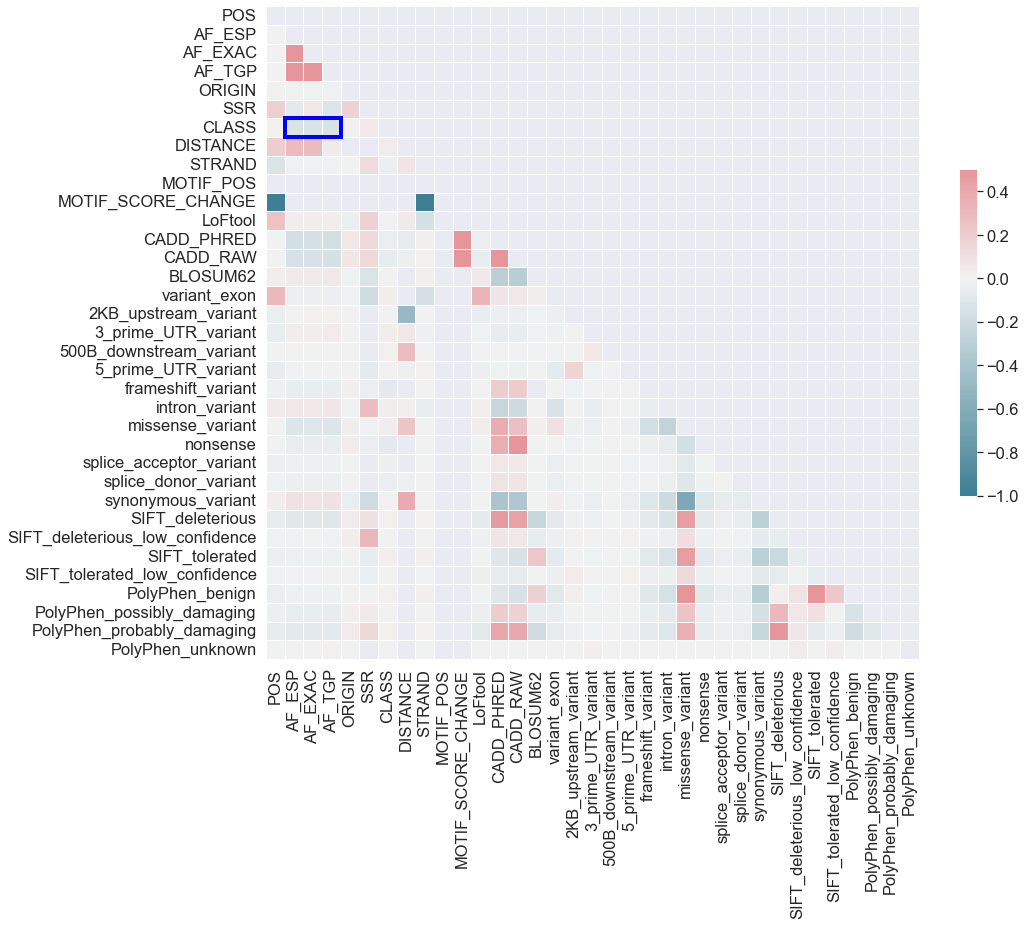

In [27]:
corr = data.select_dtypes(exclude='object').corr()

import numpy as np
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True);

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});
from matplotlib.patches import Rectangle

g.add_patch(Rectangle((1, 6), 3, 1, fill=False, edgecolor='blue', lw=4));


In [28]:
snvs = data.loc[(data.REF.str.len()==1) & (data.ALT.str.len()==1)]
indels = data.loc[(data.REF.str.len()>1) | (data.ALT.str.len()>1)]

In [29]:
len(data) == (len(snvs) + len(indels))

True

In [30]:
snp_indel = pd.concat([snvs.CLASS.value_counts(normalize=True).rename('snv_class'), 
                       indels.CLASS.value_counts(normalize=True).rename('indel_class')], 
                      axis=1).T

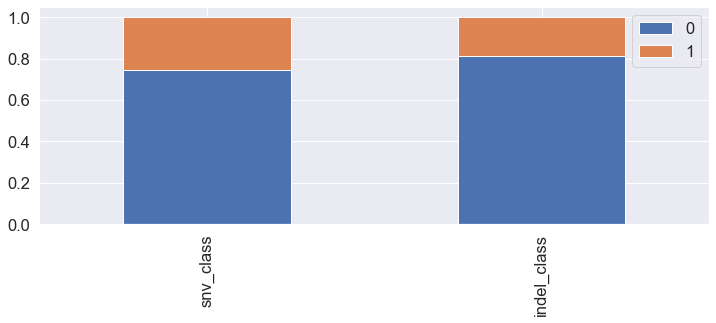

In [31]:
snp_indel.plot.bar(stacked=True, figsize=(12, 4));

C:\Users\USER\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

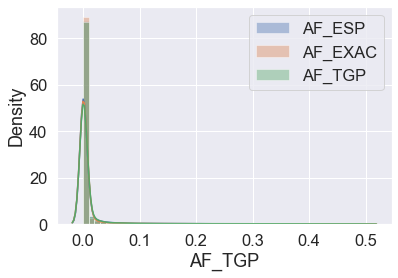

In [33]:
sns.distplot(data.AF_ESP, label="AF_ESP")
sns.distplot(data.AF_EXAC, label="AF_EXAC")
sns.distplot(data.AF_TGP, label="AF_TGP")
plt.legend();